# Grid


In this file, we will show the different partition of the state space implemented
- classical grid (composed of regular hyperrectangles)
- deformed grid
- nested classical grid
- ellipsoidal partition based on a grid

First, let us import a few packages that are necessary to run this example.

In [1]:
using Dionysos
using StaticArrays
using LinearAlgebra
using Plots

The main package [Dionysos](https://github.com/dionysos-dev/Dionysos.jl) provides most important data structures that we will need.

In [2]:
const DI = Dionysos
const UT = DI.Utils
const DO = DI.Domain

Dionysos.Domain

### Classical grid (composed of regular hyperrectangles)

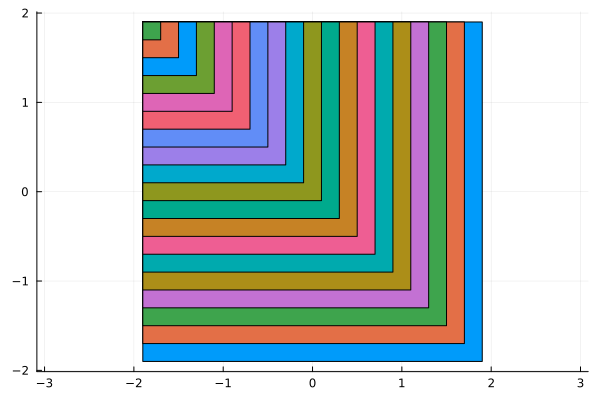

In [3]:
x0 = SVector(0.0, 0.0)
h = SVector(1.0 / 5, 1.0 / 5)
grid = DO.GridFree(x0, h)
rectX = UT.HyperRectangle(SVector(-2, -2), SVector(2, 2));
domainX = DO.DomainList(grid)
DO.add_set!(domainX, rectX, DO.INNER)
plot(; aspect_ratio = :equal);
plot!(domainX)

### Deformed grid
We define some invertible transformation (with their inverse)

In [4]:
function f1(x)
    return x
end
function fi1(x)
    return x
end
function f2(x)
    return SVector(x[2] + sin(x[1]), x[1])
end
function fi2(x)
    return SVector(x[2], x[1] - sin(x[2]))
end
function f3(x)
    return SVector(x[1] * cos(x[2]), x[1] * sin(x[2]))
end
function fi3(x)
    return SVector(sqrt(x[1] * x[1] + x[2] * x[2]), atan(x[2], x[1]))
end
function rotate(x, θ)
    R = @SMatrix [
        cos(θ) -sin(θ)
        sin(θ) cos(θ)
    ]
    return R * x
end
function build_f_rotation(θ; c = SVector(0.0, 0.0))
    function f(x)
        return rotate(x - c, θ) + c
    end
    function fi(x)
        return rotate(x - c, -θ) + c
    end
    return f, fi
end

function plot_deformed_grid_with_DomainList(f, fi)
    X = UT.HyperRectangle(SVector(0.0, 0.0), SVector(30.0, 2 * π))
    grid = DO.GridFree(SVector(0.0, 0.0), SVector(3.0, 0.3))
    Dgrid = DO.DeformedGrid(grid, f, fi)
    dom = DO.DomainList(Dgrid)
    DO.add_set!(dom, X, DO.INNER)
    plot(; aspect_ratio = :equal)
    return plot!(dom; show = true)
end

function plot_deformed_grid_with_GeneralDomain(f, fi)
    X = UT.HyperRectangle(SVector(0.0, 0.0), SVector(30.0, 2 * π))
    obstacle = UT.HyperRectangle(SVector(10.0, 10.0), SVector(15.0, 15.0))
    hx = [3.0, 0.3]
    d = DO.RectangularObstacles(X, [obstacle])
    dom = DO.GeneralDomainList(hx; elems = d, f = f, fi = fi, fit = true)
    plot(; aspect_ratio = :equal)
    return plot!(dom; show = true)
end

plot_deformed_grid_with_GeneralDomain (generic function with 1 method)

Display some deformed Grids

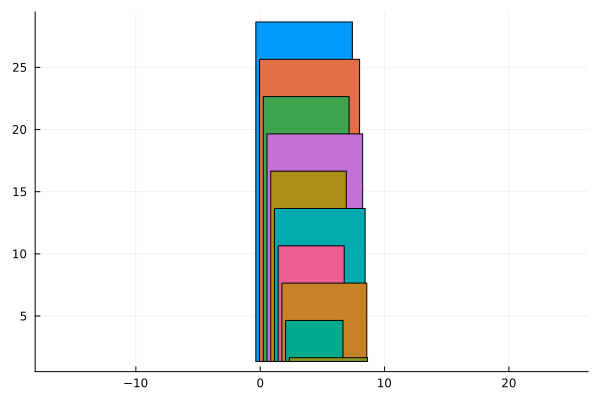

In [5]:
plot_deformed_grid_with_DomainList(f2, fi2)
plot_deformed_grid_with_GeneralDomain(f2, fi2)

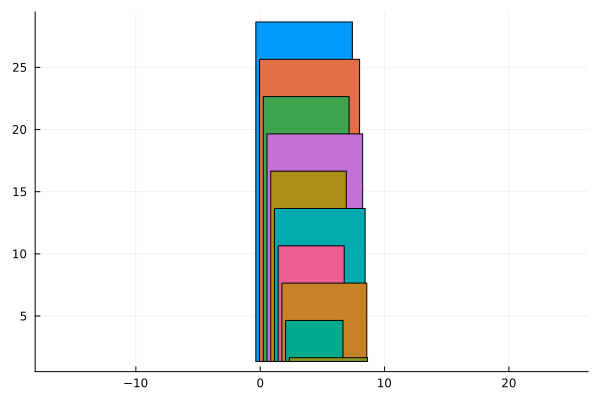

In [6]:
plot_deformed_grid_with_DomainList(f2, fi2)
plot_deformed_grid_with_GeneralDomain(f2, fi2)

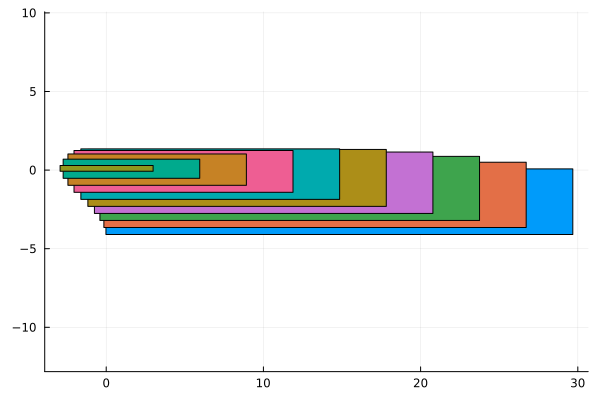

In [7]:
plot_deformed_grid_with_DomainList(f3, fi3)
plot_deformed_grid_with_GeneralDomain(f3, fi3)

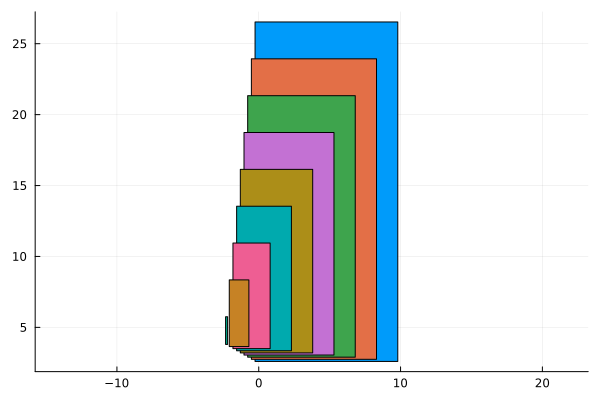

In [8]:
f, fi = build_f_rotation(π / 3.0)
plot_deformed_grid_with_DomainList(f, fi)

### Nested classical grid

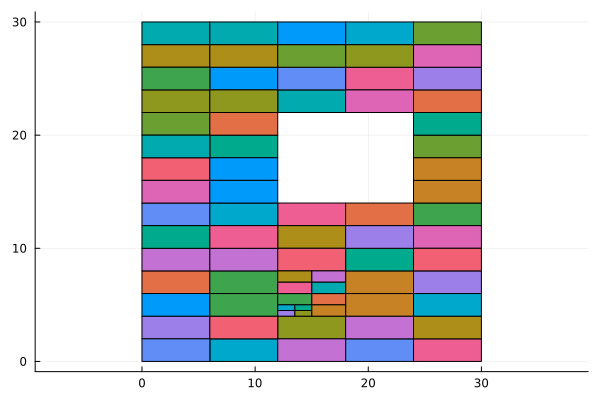

In [9]:
X = UT.HyperRectangle(SVector(0.0, 0.0), SVector(30.0, 30.0))
obstacle = UT.HyperRectangle(SVector(15.0, 15.0), SVector(20.0, 20.0))
hx = [3.0, 1.0] * 2.0
periodic = Int[1]
periods = [30.0, 30.0]
T0 = [0.0, 0.0]
d = DO.RectangularObstacles(X, [obstacle])
dom = DO.GeneralDomainList(
    hx;
    elems = d,
    periodic = periodic,
    periods = periods,
    T0 = T0,
    fit = true,
)
Ndomain = DO.NestedDomain(dom)
DO.cut_pos!(Ndomain, (2, 2), 1)
DO.cut_pos!(Ndomain, (2, 3), 1)
DO.cut_pos!(Ndomain, (4, 4), 2)

fig = plot(; aspect_ratio = :equal, legend = false);
plot!(Ndomain)

### Ellipsoidal partition based on a grid

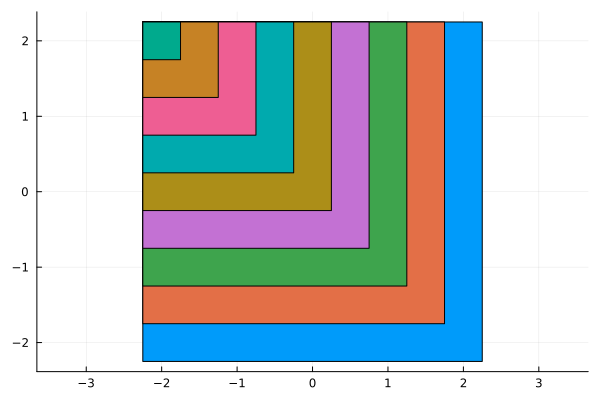

In [10]:
x0 = SVector(0.0, 0.0)
n_step = 2
h = SVector(1.0 / n_step, 1.0 / n_step)
P = 0.5 * diagm((h ./ 2) .^ (-2))
rectX = UT.HyperRectangle(SVector(-2, -2), SVector(2, 2))

grid = DO.GridEllipsoidalRectangular(x0, h, P)
domain = DO.DomainList(grid)
DO.add_set!(domain, rectX, DO.OUTER)
plot(; aspect_ratio = :equal);
plot!(domain)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*